In [17]:
import pandas as pd
import io
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the correct filename shown after upload
df = pd.read_csv(io.BytesIO(uploaded['traffic (9).csv']))

# Show the first few rows
df.head()


Saving traffic.csv to traffic (9).csv


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [19]:
# Shape and structure
print("Shape of dataset:", df.shape)
print("\nColumn Info:")
df.info()

# Check for null values
print("\nMissing values:\n", df.isnull().sum())

# Preview unique event types
print("\nEvent Types:\n", df['event'].value_counts())


Shape of dataset: (226278, 9)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB

Missing values:
 event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

Event Types:
 event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64


In [21]:
df = df.dropna().copy()

# Step 4: Convert 'date' column to datetime format safely
df['date'] = pd.to_datetime(df['date'])

# Step 5: Show clean dataset shape and preview
print("After cleaning:", df.shape)
df.head()

After cleaning: (116257, 9)


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
5,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02


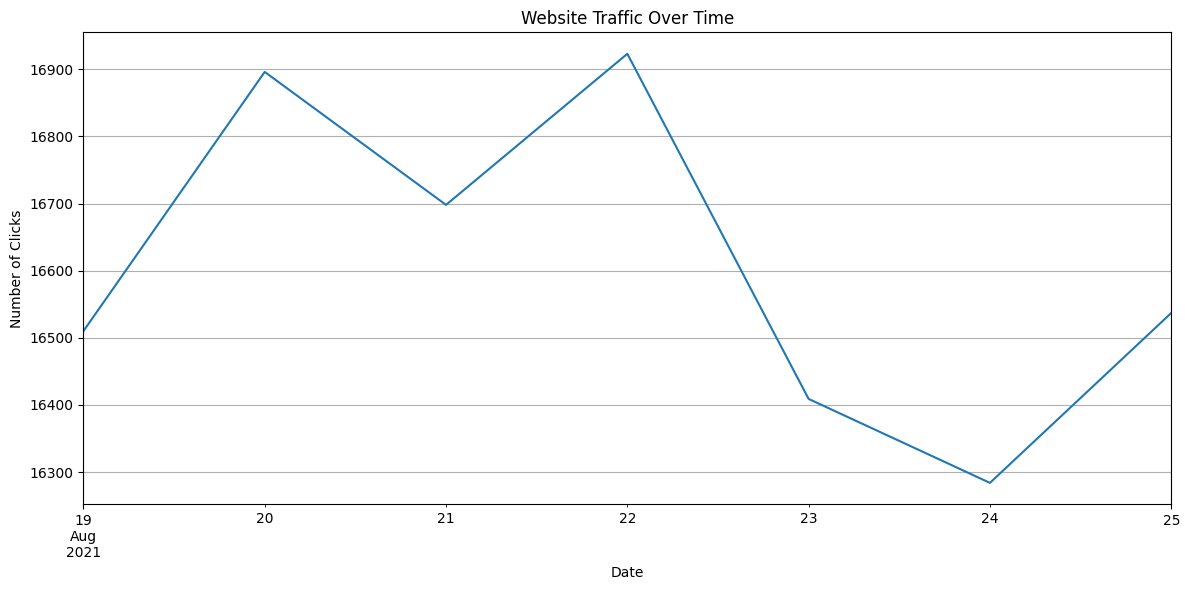

In [22]:
import matplotlib.pyplot as plt

# Group by date
traffic_over_time = df.groupby('date').size()

# Plot
plt.figure(figsize=(12,6))
traffic_over_time.plot()
plt.title("Website Traffic Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Clicks")
plt.grid(True)
plt.tight_layout()
plt.show()


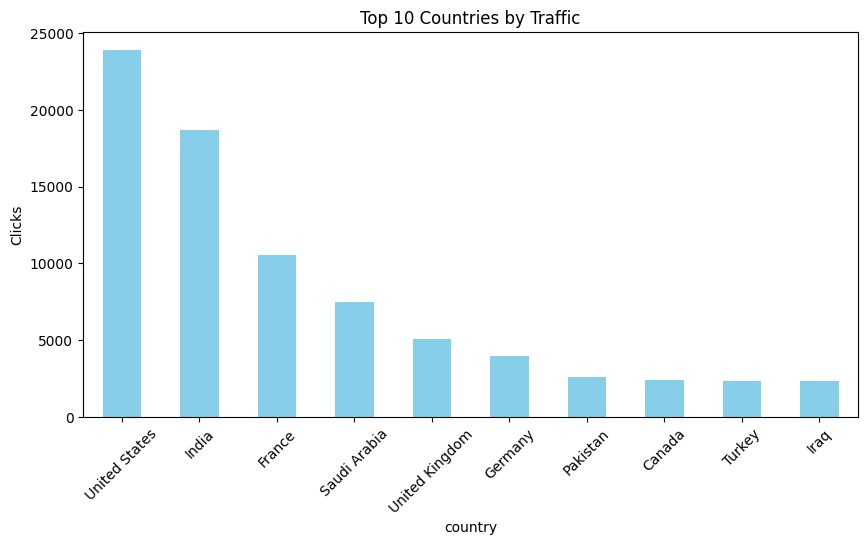

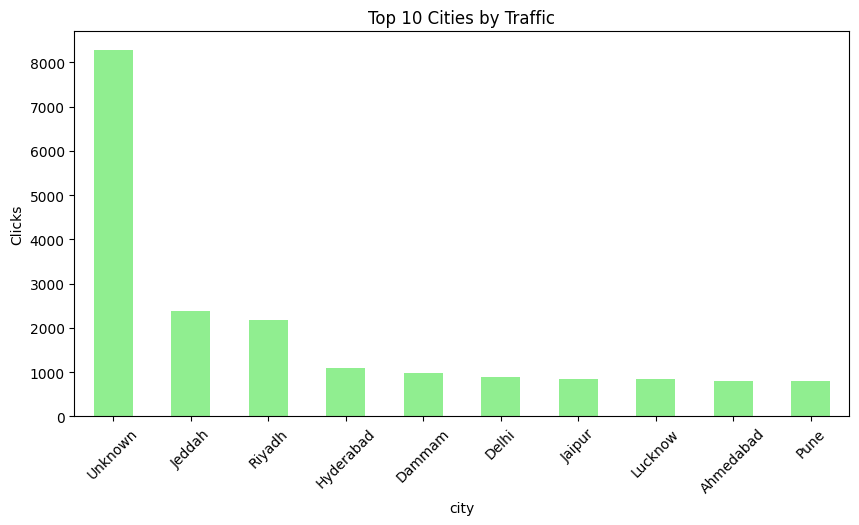

In [23]:
# Top 10 countries
top_countries = df['country'].value_counts().head(10)

# Top 10 cities
top_cities = df['city'].value_counts().head(10)

# Plot
top_countries.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Traffic', color='skyblue')
plt.ylabel("Clicks")
plt.xticks(rotation=45)
plt.show()

top_cities.plot(kind='bar', figsize=(10,5), title='Top 10 Cities by Traffic', color='lightgreen')
plt.ylabel("Clicks")
plt.xticks(rotation=45)
plt.show()


In [24]:
# Top 5 artists
print("Top 5 Artists:\n", df['artist'].value_counts().head(5))

# Top 5 albums
print("\nTop 5 Albums:\n", df['album'].value_counts().head(5))

# Top 5 tracks
print("\nTop 5 Tracks:\n", df['track'].value_counts().head(5))


Top 5 Artists:
 artist
Tesher            8288
Anne-Marie        4028
Tundra Beats      3950
Roddy Ricch       3103
Olivia Rodrigo    3025
Name: count, dtype: int64

Top 5 Albums:
 album
Jalebi Baby                             8288
Beautiful                               4028
Beautiful Day                           3950
Late At Night                           3059
ily (i love you baby) (feat. Emilee)    2947
Name: count, dtype: int64

Top 5 Tracks:
 track
Jalebi Baby                             8288
Beautiful                               4037
Beautiful Day                           3950
Late At Night                           3059
ily (i love you baby) (feat. Emilee)    2947
Name: count, dtype: int64


In [25]:
# Unique ISRCs
print("Unique ISRC codes:", df['isrc'].nunique())

# Top ISRCs by frequency
print(df['isrc'].value_counts().head(5))

# Unique Link IDs
print("Unique Link IDs:", df['linkid'].nunique())


Unique ISRC codes: 709
isrc
QZNWQ2070741    8288
GBAHS2100225    4028
QZHN92194591    3950
USAT22102236    3059
QZJRC1945204    2947
Name: count, dtype: int64
Unique Link IDs: 743


In [26]:
# Daily top artist
daily_top_artist = df.groupby(['date', 'artist']).size().reset_index(name='clicks')
daily_top_artist = daily_top_artist.sort_values(['date', 'clicks'], ascending=[True, False])

# Show top artist per day
daily_top = daily_top_artist.groupby('date').first().reset_index()
print(daily_top.head())


        date  artist  clicks
0 2021-08-19  Tesher    1203
1 2021-08-20  Tesher    1237
2 2021-08-21  Tesher    1238
3 2021-08-22  Tesher    1264
4 2021-08-23  Tesher    1155
